In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset

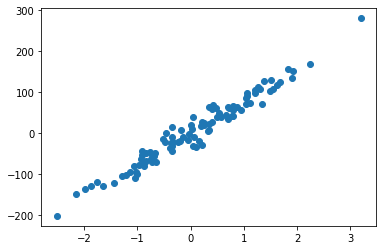

In [65]:
x, y = make_regression(n_samples= 100, n_features=2, noise = 10)
plt.scatter(x[:,1], y)

In [66]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [67]:
#matrice X
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-1.79500176  1.3469255   1.        ]
 [ 1.44905258 -0.91294722  1.        ]
 [-1.38919601 -1.05296162  1.        ]
 [ 1.56205025  0.4280711   1.        ]
 [-2.33389848  0.09163542  1.        ]
 [-0.36398564 -0.8432939   1.        ]
 [ 1.34632556 -0.489089    1.        ]
 [-0.79477877 -0.653222    1.        ]
 [ 0.24077943 -0.75309648  1.        ]
 [ 1.22458787  3.2024466   1.        ]]


In [68]:
theta = np.random.randn(3, 1)
theta.shape

(3, 1)

## Modèle linéaire

In [69]:
def model (X, theta):
    return X.dot(theta)

In [70]:
#model(X, theta)

ValueError: x and y must be the same size

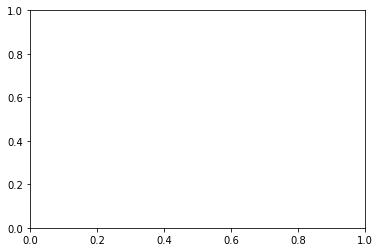

In [71]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## Fonction coût

In [72]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [73]:
cost_function(X, y, theta)

3479.5923713757516

## Gradient descent

In [74]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [75]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Entraînement

In [76]:
# Change learning_rate or n_iterations for better results
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [77]:
theta_final

array([[12.68551291],
       [78.13568577],
       [ 0.6503784 ]])

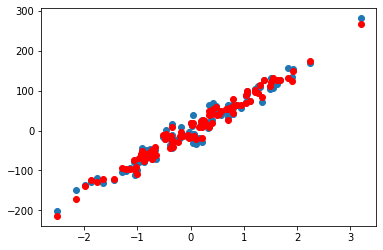

In [80]:
predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

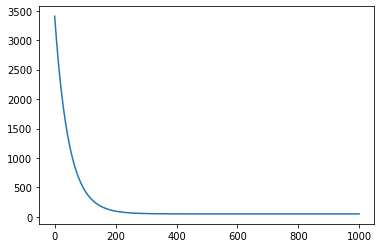

In [81]:
plt.plot(range(1000), cost_history)

## Evaluation

In [82]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [83]:
coef_determination(y, predictions)

0.9848534608178316